In [1]:
import pandas as pd  # pandas module for data manipulation
import re # Regular expression operations
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Reading all the cleaned csv files for integration
flipkart_df = pd.read_csv("Flipkart_data_cleaned.csv");
amazon_df = pd.read_csv("amazon_pantry_cleaned.csv");
jioMart_df = pd.read_csv("jio_mart_data_cleaned.csv");


In [3]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      699 non-null    object 
 1   Brand             699 non-null    object 
 2   Discounted_Price  699 non-null    float64
 3   Discount          699 non-null    float64
 4   Original_Price    699 non-null    float64
 5   Ratings           699 non-null    float64
 6   Total_Ratings     699 non-null    int64  
 7   Product_URL       699 non-null    object 
 8   Platform          699 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.3+ KB


In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      296 non-null    object 
 1   Discounted_Price  296 non-null    float64
 2   Discount          296 non-null    float64
 3   Original_Price    296 non-null    float64
 4   Rating            296 non-null    float64
 5   No_of_ratings     296 non-null    int64  
 6   itemURL           296 non-null    object 
 7   Platform          296 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 18.6+ KB


In [5]:
jioMart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        295 non-null    int64  
 1   Product_name      295 non-null    object 
 2   Discount          295 non-null    float64
 3   Discounted_Price  295 non-null    float64
 4   Original_Price    295 non-null    float64
 5   Product_Url       295 non-null    object 
 6   Product_Rating    295 non-null    int64  
 7   No_of_ratings     295 non-null    int64  
 8   Platform          295 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 20.9+ KB


In [6]:
jioMart_df

,Unnamed: 0,Product_name,Discount,Discounted_Price,Original_Price,Product_Url,Product_Rating,No_of_ratings,Platform
0,1,Good Life Toor Dal 1 kg,21.0,108.00,137.0,https://www.jiomart.com/good-life-toor-dal-1-k...,0,0,Jiomart
1,2,Good Life Rice Bran Oil 1 Ltr,21.0,99.00,125.0,https://www.jiomart.com/good-life-rice-bran-oi...,0,0,Jiomart
2,3,Good Life Urad Dal 500 g,12.0,70.00,80.0,https://www.jiomart.com/good-life-urad-dal-500...,0,0,Jiomart
3,4,Good Life Jeerasar Rice 1 kg,17.0,49.00,59.0,https://www.jiomart.com/good-life-jeerasar-ric...,0,0,Jiomart
4,5,India Gate Basmati Rice Rozana 5 Kg,22.0,389.00,500.0,https://www.jiomart.com/india-gate-basmati-ric...,0,0,Jiomart
5,6,Suhana Ambari Mirchi Powder 100 g,7.0,39.99,43.0,https://www.jiomart.com/suhana-ambari-mirchi-p...,0,0,Jiomart
6,7,Loose Chana Dal 1 kg,10.0,61.00,68.0,https://www.jiomart.com/loose-chana-dal-1-kg-4...,0,0,Jiomart
7,8,Best Farm Maize Popcorn Kernels 500 g,7.0,55.80,60.0,https://www.jiomart.com/best-farm-maize-popcor...,0,0,Jiomart
8,9,Fortune Jubilee Regular Long Grain Rice 1 kg,71.0,43.00,150.0,https://www.jiomart.com/fortune-jubilee-regula...,0,0,Jiomart
9,10,Loose Moong Dal 1 kg,2.0,130.00,132.0,https://www.jiomart.com/loose-moong-dal-1-kg-4...,0,0,Jiomart


### So, there are column names mismatch and very minor changes needs to taken care before merging.

In [7]:
# removing Unnamed column from JioMart Data
jioMart_df = jioMart_df.drop(['Unnamed: 0'], axis = 1) 

In [8]:
# adding the Brand column to amazon and jiomart datasets
amazon_df['Brand'] = amazon_df['Product_Name'].str.split(' ').str[0]
amazon_df

,Product_Name,Discounted_Price,Discount,Original_Price,Rating,No_of_ratings,itemURL,Platform,Brand
0,SHRILALMAHAL Fitness Brown Basmati Rice (Weigh...,559.0,20.0,700.0,3.9,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,SHRILALMAHAL
1,"NutroActive BrownXatta, HIGH Protein & Low Car...",312.0,4.0,324.0,3.8,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,NutroActive
2,NutroActive BrownXatta High Protein & Low Carb...,2098.0,17.0,2520.0,3.7,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,NutroActive
3,Toor Dal Economy 1Kg,102.0,15.0,120.0,4.1,66,https://www.amazon.in/ASOP-Toor-Dal-Economy-1K...,Amazon,Toor
4,"Amazon Brand - Vedaka Popular Chana Dal, 1 kg",85.0,29.0,120.0,4.3,100,https://www.amazon.in/Amazon-Brand-Vedaka-Popu...,Amazon,Amazon
5,"Daawat Rozana Gold Basmati Rice, 5kg",374.0,16.0,446.0,3.8,649,https://www.amazon.in/Daawat-Rozana-Gold-Basma...,Amazon,Daawat
6,"Daawat Super Basmati, 1kg with 25% Extra",139.0,13.0,160.0,4.2,770,https://www.amazon.in/Daawat-Super-Basmati-1kg...,Amazon,Daawat
7,"Amazon Brand - Vedaka Premium Toor Dal, 1kg",118.0,16.0,140.0,4.2,1183,https://www.amazon.in/Amazon-Brand-Vedaka-Prem...,Amazon,Amazon
8,Kabuli Chana Economy 1Kg,81.0,10.0,90.0,3.9,97,https://www.amazon.in/ASOP-Kabuli-Chana-Econom...,Amazon,Kabuli
9,"Fortune Chakki Fresh Atta, 5kg",199.0,26.0,270.0,4.0,221,https://www.amazon.in/Fortune-Chakki-Fresh-Att...,Amazon,Fortune


In [9]:

# adding the Brand column to amazon and jiomart datasets
jioMart_df['Brand'] = jioMart_df['Product_name'].str.split(' ').str[0]
jioMart_df

,Product_name,Discount,Discounted_Price,Original_Price,Product_Url,Product_Rating,No_of_ratings,Platform,Brand
0,Good Life Toor Dal 1 kg,21.0,108.00,137.0,https://www.jiomart.com/good-life-toor-dal-1-k...,0,0,Jiomart,Good
1,Good Life Rice Bran Oil 1 Ltr,21.0,99.00,125.0,https://www.jiomart.com/good-life-rice-bran-oi...,0,0,Jiomart,Good
2,Good Life Urad Dal 500 g,12.0,70.00,80.0,https://www.jiomart.com/good-life-urad-dal-500...,0,0,Jiomart,Good
3,Good Life Jeerasar Rice 1 kg,17.0,49.00,59.0,https://www.jiomart.com/good-life-jeerasar-ric...,0,0,Jiomart,Good
4,India Gate Basmati Rice Rozana 5 Kg,22.0,389.00,500.0,https://www.jiomart.com/india-gate-basmati-ric...,0,0,Jiomart,India
5,Suhana Ambari Mirchi Powder 100 g,7.0,39.99,43.0,https://www.jiomart.com/suhana-ambari-mirchi-p...,0,0,Jiomart,Suhana
6,Loose Chana Dal 1 kg,10.0,61.00,68.0,https://www.jiomart.com/loose-chana-dal-1-kg-4...,0,0,Jiomart,Loose
7,Best Farm Maize Popcorn Kernels 500 g,7.0,55.80,60.0,https://www.jiomart.com/best-farm-maize-popcor...,0,0,Jiomart,Best
8,Fortune Jubilee Regular Long Grain Rice 1 kg,71.0,43.00,150.0,https://www.jiomart.com/fortune-jubilee-regula...,0,0,Jiomart,Fortune
9,Loose Moong Dal 1 kg,2.0,130.00,132.0,https://www.jiomart.com/loose-moong-dal-1-kg-4...,0,0,Jiomart,Loose


### Renaming columns to maintatin uniqueness

In [10]:
# Rename the column names according to b1
jioMart_df.rename(columns={'Product_name':'Product_Name','Product_Url':'Product_URL'}, inplace=True)
flipkart_df.rename(columns={'Product_name':'Product_Name','Total_Ratings':'No_of_ratings','Ratings':'Product_Rating'}, inplace=True)
amazon_df.rename(columns={'itemURL':'Product_URL','Rating':'Product_Rating'}, inplace=True)

### concatinating all the three DataFrames

In [11]:
products_df = pd.concat([flipkart_df, amazon_df, jioMart_df], ignore_index=True)

In [29]:
print(products_df.info())
print("=========================================================================")
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      1290 non-null   object 
 1   Brand             1290 non-null   object 
 2   Discounted_Price  1290 non-null   float64
 3   Discount          1290 non-null   float64
 4   Original_Price    1290 non-null   float64
 5   Product_Rating    1290 non-null   float64
 6   No_of_ratings     1290 non-null   int64  
 7   Product_URL       1290 non-null   object 
 8   Platform          1290 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 90.8+ KB
None


,Discounted_Price,Discount,Original_Price,Product_Rating,No_of_ratings
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,421.072767,21.254264,598.178295,3.052248,1264.744186
std,644.431029,16.758185,980.501090,1.937975,5713.579424
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,8.000000,159.250000,0.000000,0.000000
50%,268.000000,17.000000,325.000000,4.200000,26.000000
75%,494.750000,31.000000,695.000000,4.400000,314.500000
max,10919.000000,80.000000,13549.000000,5.000000,67578.000000


In [13]:
#Checking for duplicates 
duplicateDFRow = products_df[products_df.duplicated(['Product_Name'])]
print(duplicateDFRow)

Empty DataFrame
Columns: [Product_Name, Brand, Discounted_Price, Discount, Original_Price, Product_Rating, No_of_ratings, Product_URL, Platform]
Index: []


As we see, there are no duplicate items in the dataframe

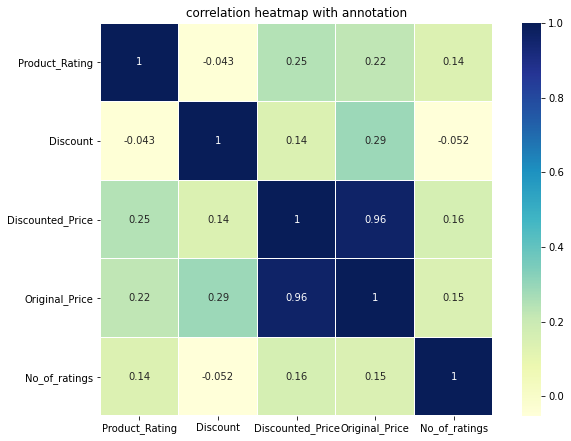

In [23]:
# taking the number of columns in a dataframe
corr_df = products_df[["Product_Rating","Discount", "Discounted_Price","Original_Price","No_of_ratings"]].copy()

n=corr_df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(corr_df.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("correlation heatmap with annotation")
plt.show()

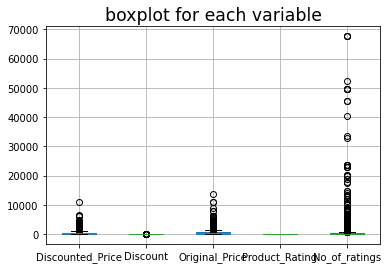

In [14]:
products_df.boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

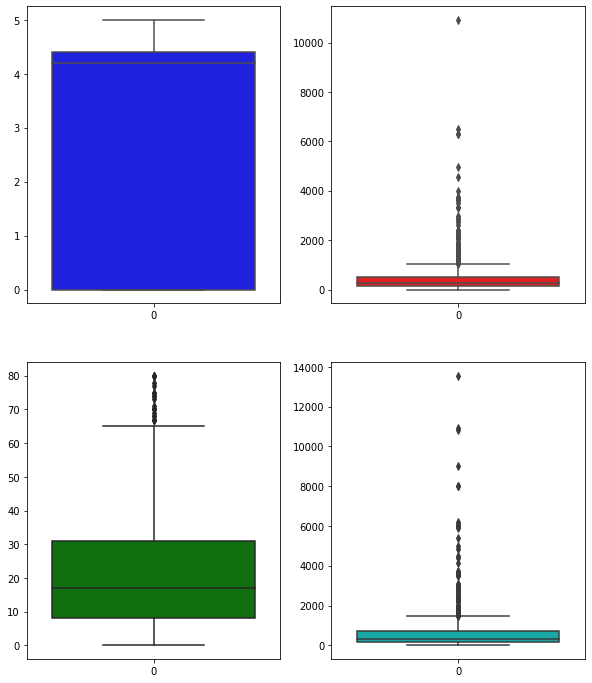

In [26]:
# Creating a seperate dataframe for necessary values those can be plotted.
plotdf = products_df[["Product_Rating","Discount", "Discounted_Price","Original_Price"]].copy()
# bollywood[["YoutubeViews","YoutubeLikes","YoutubeDislikes","Budget","BoxOfficeCollection","ReleaseTime"]].copy();
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']

# defining the plot area into 3 rows and 2 columns with each plot size with 10x10 size.
# sharex=False represents, they don't share the common X axis.
# precisely, every feature's x-axis is independent of itself
f, axes = plt.subplots(2, 2, figsize=(10, 12), sharex=False)
for i, feature in enumerate(plotdf.columns):
    # boxplot takes first argument as column name data of dataset to represent the graph
    # color here is displayed using Array
    # ax specifies the plot block where it needs to get rendered.
    sns.boxplot(data = plotdf[feature] , color=colors[i], ax=axes[i%2, i//2])